In [1]:
using PyPlot, LinearAlgebra

## A simple least-squares fitting problem

Let's fit $m$ data points $(a_i, b_i)$ to a straight line $a(b) = x_1 + x_2 b$.  With a least-square fit, minimizing
$$f(x) = \Vert b - Ax \Vert^2/m =\frac{1}{m} \sum_i \underbrace{(b_i - (Ax)_i)^2}_{f_i(x)}\, ,$$
the solution is simply $\hat{x} = A \setminus b = (A^T A)^{-1} A^T b$ where

$$
A = \begin{pmatrix} 1 & a_1 \\ 1 & a_2 \\ \vdots & \vdots \\ 1 & a_m \end{pmatrix}
$$

Let's do that for 1000 data points given by a line $1 + 2a$ plus some noise:

In [77]:
m = 1000
a = randn(m)
b = @. 1 + 2a + randn()
A = [one.(a) a]
x̂ = A \ b

2-element Vector{Float64}:
 0.909278704461504
 2.0709823897437754

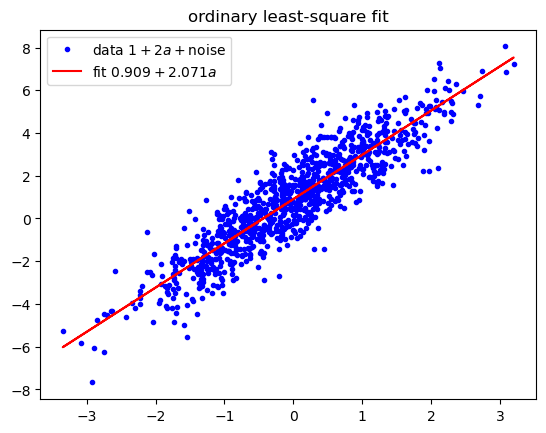

PyObject <matplotlib.legend.Legend object at 0x7fa68f62be50>

In [78]:
title("ordinary least-square fit")
plot(a, b, "b.")
plot(a, x̂[1] .+ x̂[2] .* a, "r-")
legend([L"data $1+2a+\mathrm{noise}$", L"fit $%$(round(x̂[1],digits=3)) + %$(round(x̂[2],digits=3))a$"])

## Gradient descent

We can instead solve this problem by gradient descent with a fixed stepsize $s$.  At each iteration
$$
x^{(k+1)} = x^{(k)} - s \nabla f^{(k)}
$$
where for $f(x) = \frac{1}{m}\Vert b - Ax \Vert^2 = \frac{1}{m}(b-Ax)^T (b-Ax)$ we have $\nabla f = \frac{2}{m}A^T(Ax - b)$.   We'll start with an initial "guess" of $x^{(1)} = [0,0]$.

This is sometimes called **"full batch" gradient descent"**: we are looking at the **whole "batch"** of training data at once.

We'll use the [Interact.jl package](https://github.com/JuliaGizmos/Interact.jl) to visualize the progress of this algorithm as we vary the stepsize $s$.

For goodd convergence, we should typically have $s < 1/L$ where $L \approx 2$ is the Lipschitz constant of $f$, corresponding to the largest eigenvalue of the Hessian $2A^T A / m$.  So, convenience we'll specify $sL$ instead of $s$ — for $sL > 1$ we'll see that it "overshoots" the optimum and oscillates.

In [81]:
using Interact

f(x) = norm(b-A*x)^2 / m
f(x1,x2) = f([x1,x2])
x1 = range(-2,3, length=100)
x2 = range(0,4,length=100)
fvals = f.(x1',x2)

@show L = (2/m) * maximum(eigvals(A'*A)) # Lipschitz constant

f1 = figure(figsize=(10,4))
@manipulate for sL in slider(0.05:0.05:2, value=0.3, label="s × L"),
                iterations in slider(10:100, value=20, label="# iterations")
    withfig(f1) do
        s = sL / L
        x = [0.0,0.0]
        X = [x]
        ΔX = [norm(x - x̂)]
        for i = 1:iterations
            ∇f = (2/m)*(A'*(A*x - b))
            x = x - s * ∇f
            push!(X, x)
            push!(ΔX, norm(x - x̂))
        end
        
        subplot(1,2,1)
        plt.subplots_adjust(wspace=0.4)
        contour(x1', x2, fvals)
        plot(x̂[1], x̂[2], "r*")
        plot(getindex.(X,1), getindex.(X,2), "ko-")
        xlabel(L"x_1")
        ylabel(L"x_2")
        title("gradient-descent iterates x")
        
        subplot(1,2,2)
        semilogy(ΔX, "ko-")
        ylim(1e-10, 2)
        xlabel("iteration")
        ylabel(L"\Vert x - \hat{x} \Vert")
        title("error")
    end
end

L = (2 / m) * maximum(eigvals(A' * A)) = 2.1850688743919733


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s × L"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 40, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/stevenj/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000112f7fb20, Task (runnable) @0x0000000112f7fb20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.05\",\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\",\"1.05\",\"1.1\",\"1.15\",\"1.2\",\"1.25\",\"1.3\",\"1.35\",\"1.4\",\"1.45\",\"1.5\",\"1.55\",\"1.6\",\"1.65\",\"1.7\",\"1.75\",\"1.8\",\"1.85\",\"1.9\",\"1.95\"

## Stochastic gradient descent

In the most basic form of stochastic gradient descent, we look at one data point at a time, chosen at random.  More generally, we can look at "mini-batches" of $M$ data points at a time.  That is, we will only **estimate**
$$
\nabla f = E[\nabla f_i] \approx \frac{1}{M} \sum_{i \in \text{mini-batch}} \nabla f_i
$$
The simplest case is $M=1$: we only look at one data point at a time!

This is *much* cheaper than computing $\nabla f$ when the size of the training is large.   (In fact, we can even handle *infinite* training sets this way, where the training data is generated randomly as needed.)

Let's see how it works for the problem above, sampling data at random from an infinite ($m=\infty$) training set generated as needed from the same model as above:

In [ ]:
using Interact

x̂₀ = [1,2] # ground-truth model

f2 = figure(figsize=(10,4))
@manipulate for sL in slider(0.05:0.05:2, value=0.3, label="s × L"),
                M in slider(1:10, value=1, label="mini-batch M")
                iterations in slider(10:100, value=20, label="# iterations")
    withfig(f2) do
        s = sL / L
        x = [0.0,0.0]
        X = [x]
        ΔX = [norm(x - x̂₀)]
        for i = 1:iterations
            A\_M
            ∇f = (2/m)*(A'*(A*x - b))
            x = x - s * ∇f
            push!(X, x)
            push!(ΔX, norm(x - x̂))
        end
        
        subplot(1,2,1)
        plt.subplots_adjust(wspace=0.4)
        contour(x1', x2, fvals)
        plot(x̂[1], x̂[2], "r*")
        plot(getindex.(X,1), getindex.(X,2), "ko-")
        xlabel(L"x_1")
        ylabel(L"x_2")
        title("gradient-descent iterates x")
        
        subplot(1,2,2)
        semilogy(ΔX, "ko-")
        ylim(1e-10, 2)
        xlabel("iteration")
        ylabel(L"\Vert x - \hat{x} \Vert")
        title("error")
    end
end